# 1. Defining the Question

The task is to help an enterprenuer identify which individuals are most likely to click on her ads.

# 2. Metric for success

Success will be achieved by perfoming EDA to identify which individuals are most likely to click on her ads.

# 3. The Context

The data is about A Kenyan entrepreneur who has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads

# 4. Experimental design

The design that will be used,Cleaning and tidying the dataset and EDA will be perfomed using R.

# 5. Reading the data

In [1]:
# install package data.table to work with data tables
library(data.table) # load package
# install packages to work with data frame - extends into visualization
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [2]:
# Reading our dataset
# ---
# 
data <- fread('http://bit.ly/IPAdvertisingData')

# Previewing the first 6 records of the dataset
# ---
# 
head(data)
str(data)
dim(data)
class(data)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dttm>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


Classes ‘data.table’ and 'data.frame':	1000 obs. of  10 variables:
 $ Daily Time Spent on Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily Internet Usage    : num  256 194 236 246 226 ...
 $ Ad Topic Line           : chr  "Cloned 5thgeneration orchestration" "Monitored national standardization" "Organic bottom-line service-desk" "Triple-buffered reciprocal time-frame" ...
 $ City                    : chr  "Wrightburgh" "West Jodi" "Davidton" "West Terrifurt" ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : chr  "Tunisia" "Nauru" "San Marino" "Italy" ...
 $ Timestamp               : POSIXct, format: "2016-03-27 00:53:11" "2016-04-04 01:39:02" ...
 $ Clicked on Ad           : int  0 0 0 0 0 0 0 1 0 0 ...
 - attr(*, ".internal.selfref")=<externalptr> 


[1] 1000   10

[1] "data.table" "data.frame"

# 6. Tidying the dataset

In [3]:
# Renaming Male to Gender and changing the data type

colnames(data)[colnames(data) == 'Male'] = 'Gender'

In [4]:
# Checking the missing values
colSums(is.na(data))

# There are no missing values in any column

Daily Time Spent on Site                      Age              Area Income 
                       0                        0                        0 
    Daily Internet Usage            Ad Topic Line                     City 
                       0                        0                        0 
                  Gender                  Country                Timestamp 
                       0                        0                        0 
           Clicked on Ad 
                       0

In [5]:
# Checking for duplicates
duplicated_data <- data[duplicated(data),]
duplicated_data

# There are no duplicates in this dataset

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dttm>,<int>


In [6]:
# Checking the unique values in the dataset
unique_values <- data[!duplicated(data),]
unique_values

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dttm>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0


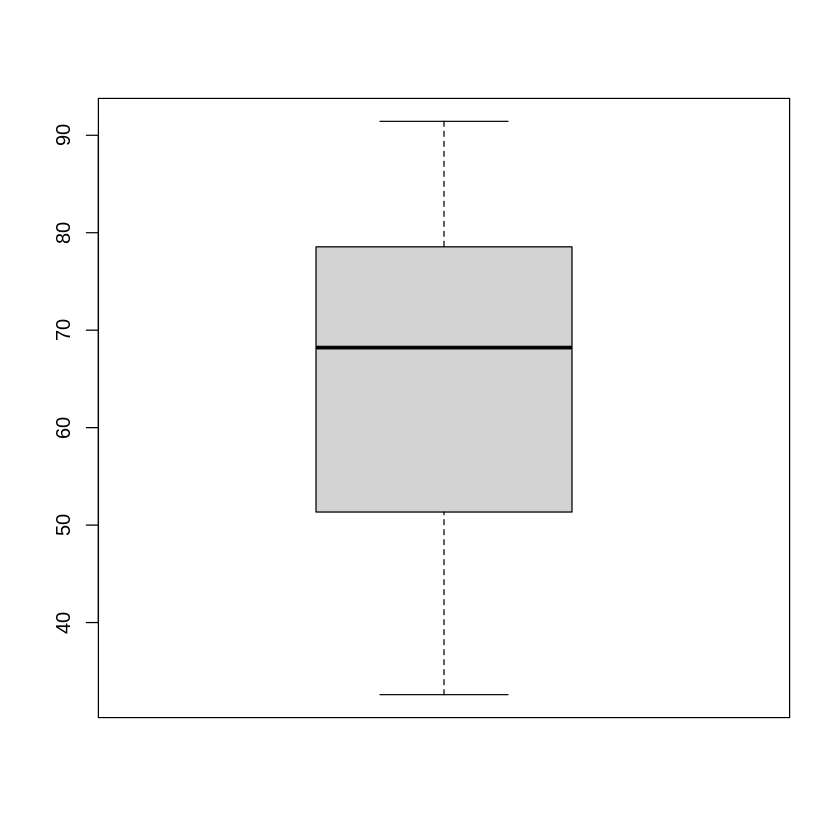

In [7]:
# Checking for outliers
boxplot(data$"Daily Time Spent on Site")

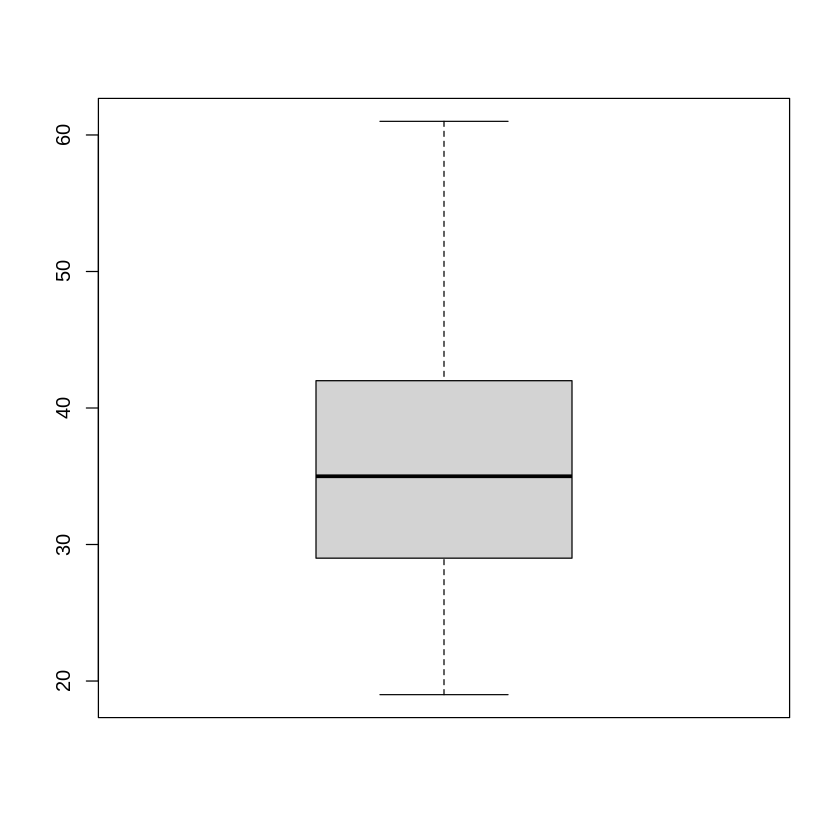

In [8]:
boxplot(data$"Age")

In [9]:
boxplot.stats(data$"Area Income")$out

[1] 17709.98 18819.34 15598.29 15879.10 14548.06 13996.50 14775.50 18368.57

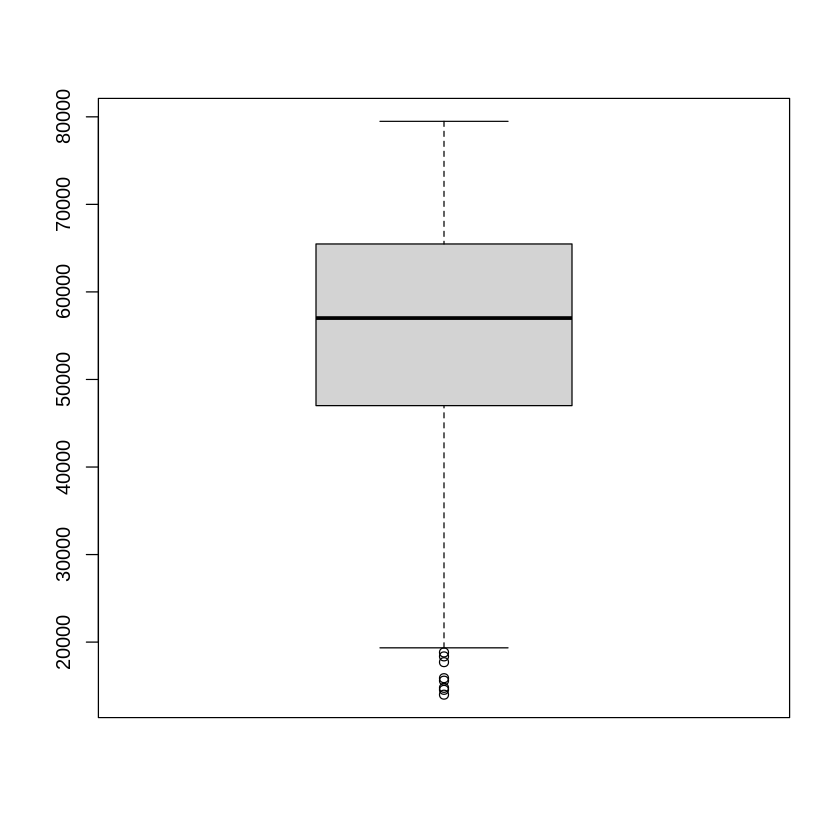

In [10]:
boxplot(data$"Area Income")

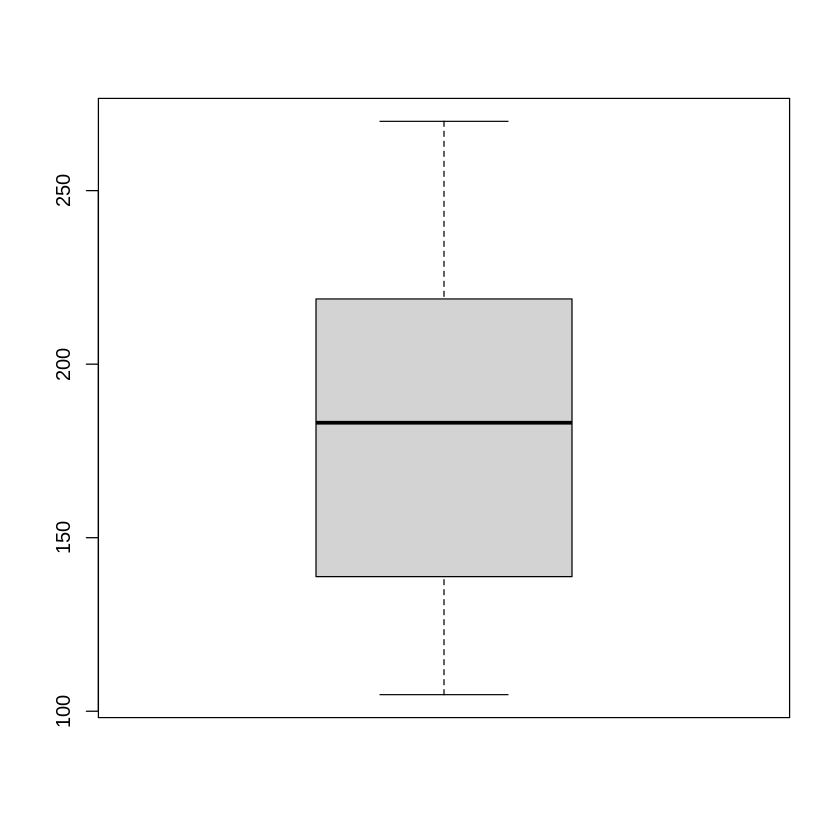

In [11]:
boxplot(data$"Daily Internet Usage")

In [13]:
head(data)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dttm>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


# 7. Analysis

In [14]:
install.packages("ggthemes")
install.packages("funModeling")
install.packages("Hmisc")
install.packages("DataExplorer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘gtools’, ‘caTools’, ‘Formula’, ‘latticeExtra’, ‘htmlTable’, ‘viridis’, ‘gplots’, ‘plyr’, ‘Hmisc’, ‘ROCR’, ‘gridExtra’, ‘pander’, ‘reshape2’, ‘lazyeval’, ‘moments’, ‘entropy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘igraph’, ‘networkD3’




In [15]:
# Importing Libraries
library(dplyr) # Data manipulation
library(data.table)
library(tidyverse)
library(ggplot2) # Data visualization
library(ggthemes) # Plot themes
library(DataExplorer)
library(funModeling) 
library(tidyverse) 
library(Hmisc)


Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


funModeling v.1.9.4 :)
Examples and tutorials at livebook.datascienceheroes.com
 / Now in Spanish: librovivodecienciadedatos.ai



In [16]:
# The mean values for numerical columns
# The mean of daily time spent on site
mean.time <- mean(data$"Daily Time Spent on Site")
mean.time

# The mean of the age column
mean.age <- mean(data$"Age")
mean.age

# The mean of the Area income
mean_income <- mean(data$"Area Income")
mean_income

# The mean of daily internet usage
mean.internet <- mean(data$"Daily Internet Usage")
mean.internet


[1] 65.0002

[1] 36.009

[1] 55000

[1] 180.0001

In [17]:
# The median values
# The median of daily time spent on site
median.time <- median(data$"Daily Time Spent on Site")
median.time

# The median of the age column
median.age <- median(data$"Age")
median.age

# The median of the Area income
median_income <- median(data$"Area Income")
median_income

# The median of daily internet usage
median.internet <- median(data$"Daily Internet Usage")
median.internet


[1] 68.215

[1] 35

[1] 57012.3

[1] 183.13

In [18]:
# The mode for age

getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

mode_age <- getmode(data$"Age")
mode_age


# The most repeated age was 31

[1] 31

In [19]:
# The minimum elements
# The minimum of daily time spent on site
minimum.time <- min(data$"Daily Time Spent on Site")
minimum.time

# The minimum of the age column
minimum.age <- min(data$"Age")
minimum.age

# The minimum of the Area income
minimum_income <- min(data$"Area Income")
minimum_income

# The minimum of daily internet usage
minimum.internet <- min(data$"Daily Internet Usage")
minimum.internet

[1] 32.6

[1] 19

[1] 13996.5

[1] 104.78

In [20]:
# The maximum values

# The maximum of daily time spent on site
maximum.time <- max(data$"Daily Time Spent on Site")
maximum.time

# The maximum of the age column
maximum.age <- max(data$"Age")
maximum.age

# The maximum of the Area income
maximum_income <- max(data$"Area Income")
maximum_income

# The maximum of daily internet usage
maximum.internet <- max(data$"Daily Internet Usage")
maximum.internet

[1] 91.43

[1] 61

[1] 79484.8

[1] 269.96

In [21]:
# Quantile
# The age quantiles
age_quantile <- quantile(data$"Age")
age_quantile

0%  25%  50%  75% 100% 
  19   29   35   42   61

In [22]:
# Quantiles of the area income
income_quantile <- quantile(data$"Area Income")
income_quantile

0%      25%      50%      75%     100% 
13996.50 47031.80 57012.30 65470.64 79484.80

In [23]:
# Variances 

# The variance of daily time spent on site
variance.time <- var(data$"Daily Time Spent on Site")
variance.time

# The variance of the age column
variance.age <- var(data$"Age")
variance.age

# The variance of the Area income
variance_income <- var(data$"Area Income")
variance_income

# The variance of daily internet usage
variance.internet <- var(data$"Daily Internet Usage")
variance.internet

[1] 251.3371

[1] 77.18611

[1] 179952406

[1] 1927.415

In [24]:
# Standard Deviations

# The sd of daily time spent on site
sd.time <- sd(data$"Daily Time Spent on Site")
sd.time

# The sd of the age column
sd.age <- sd(data$"Age")
sd.age

# The sd of the Area income
sd_income <- sd(data$"Area Income")
sd_income

# The sd of daily internet usage
sd.internet <- sd(data$"Daily Internet Usage")
sd.internet

[1] 15.85361

[1] 8.785562

[1] 13414.63

[1] 43.90234

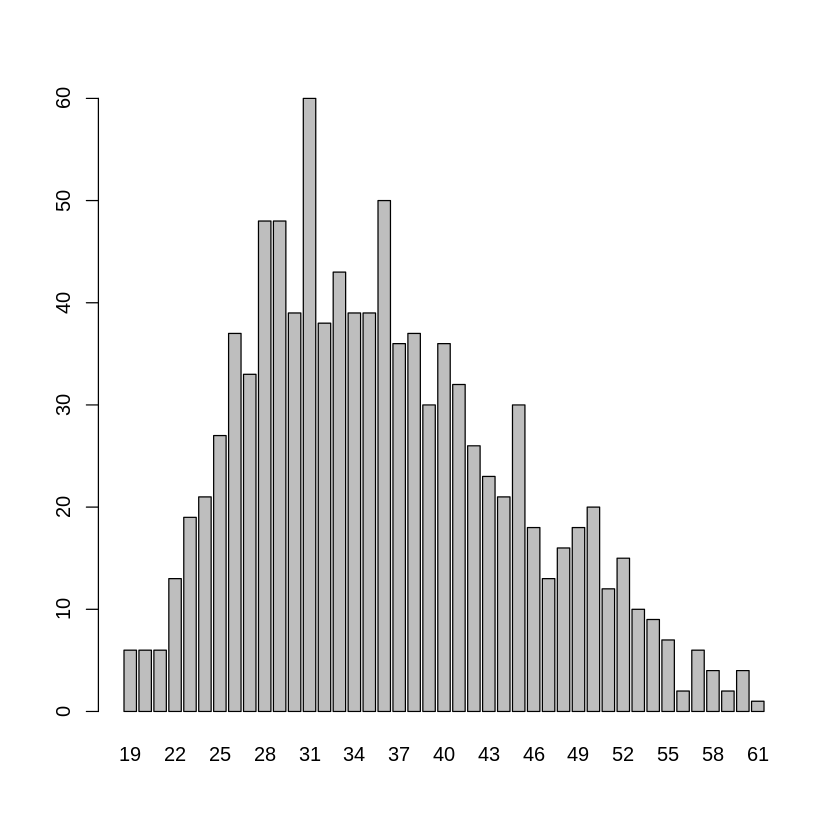

In [25]:
# Bar plot of age distribution
age <- data$Age
age_frequency <- table(age)
barplot(age_frequency)

# Age ranges between 19 and 61 years

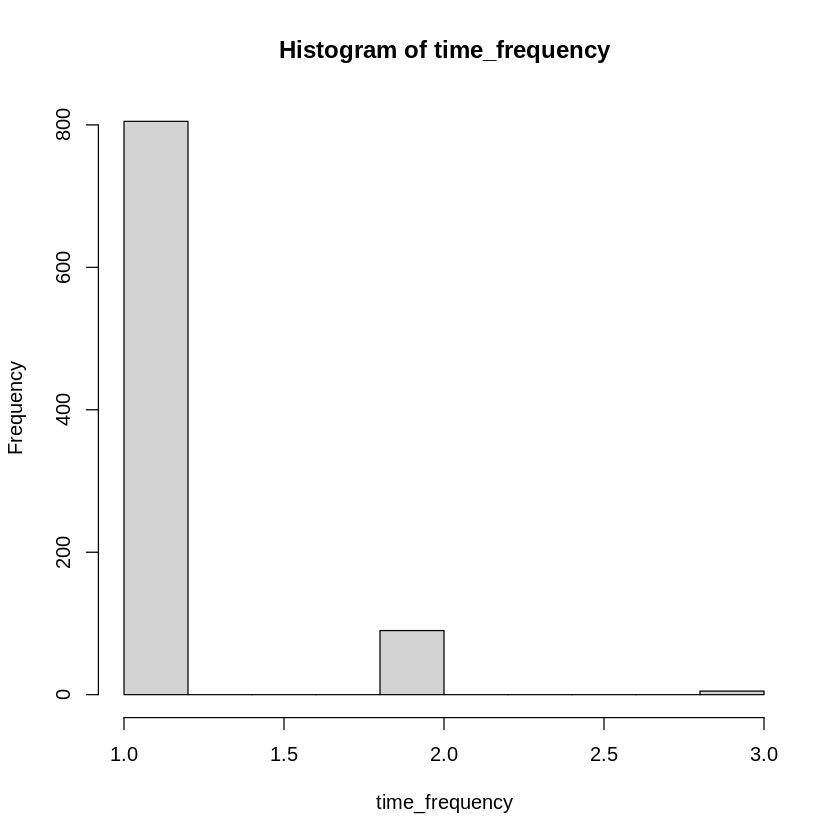

In [26]:
# histogram on frequency of daily time spent on site
time <- data$"Daily Time Spent on Site"
time_frequency <- table(time)
hist(time_frequency)

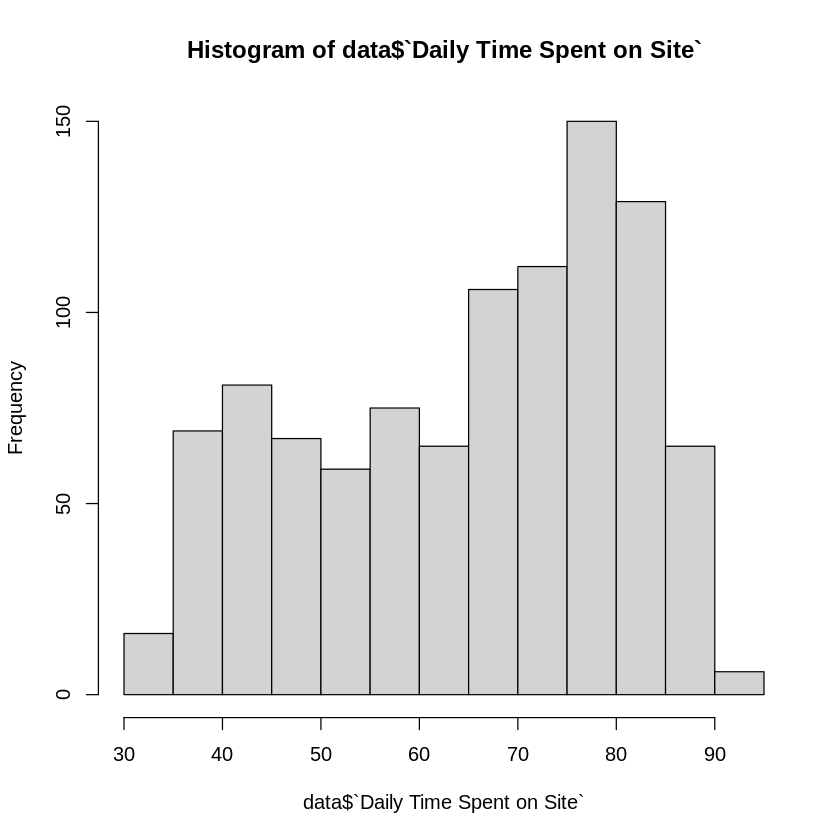

In [27]:
# A histogram on time spent on site
hist(data$`Daily Time Spent on Site`)

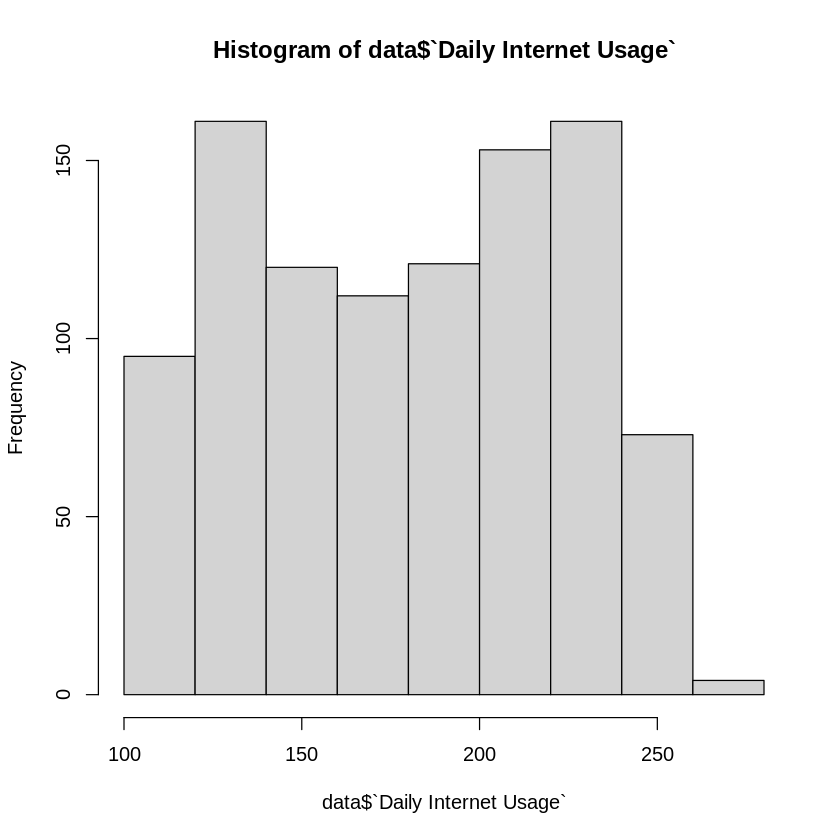

In [28]:
# A histogram on daily internet usage
hist(data$`Daily Internet Usage`)

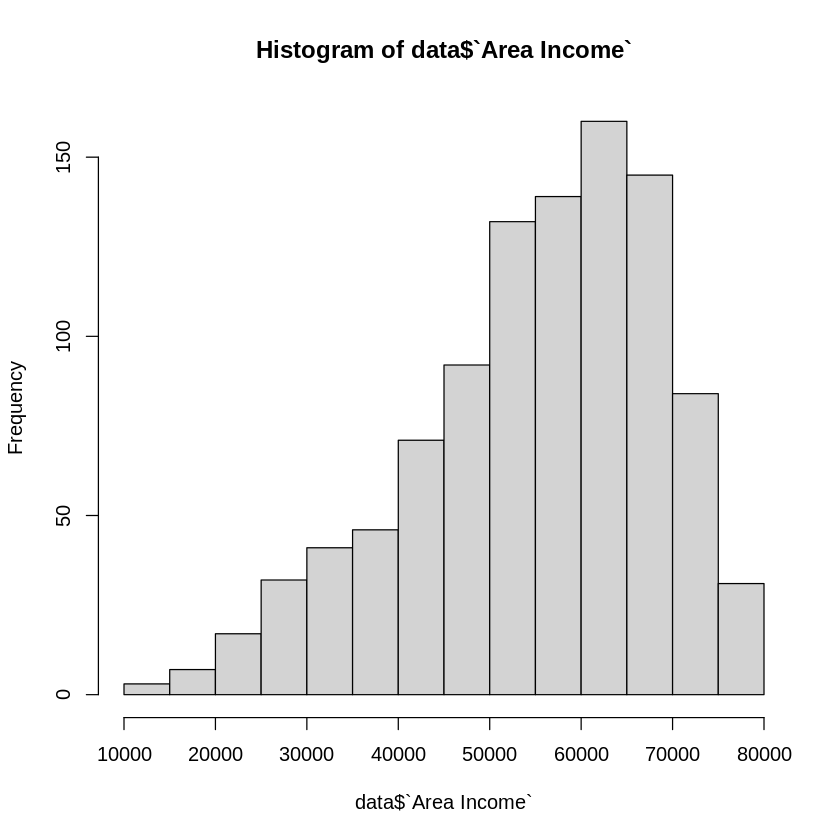

In [29]:
# Distribution of income on a histogram
hist(data$`Area Income`)

var,frequency,percentage,cumulative_perc
<chr>,<int>,<dbl>,<dbl>
0,519,51.9,51.9
1,481,48.1,100.0


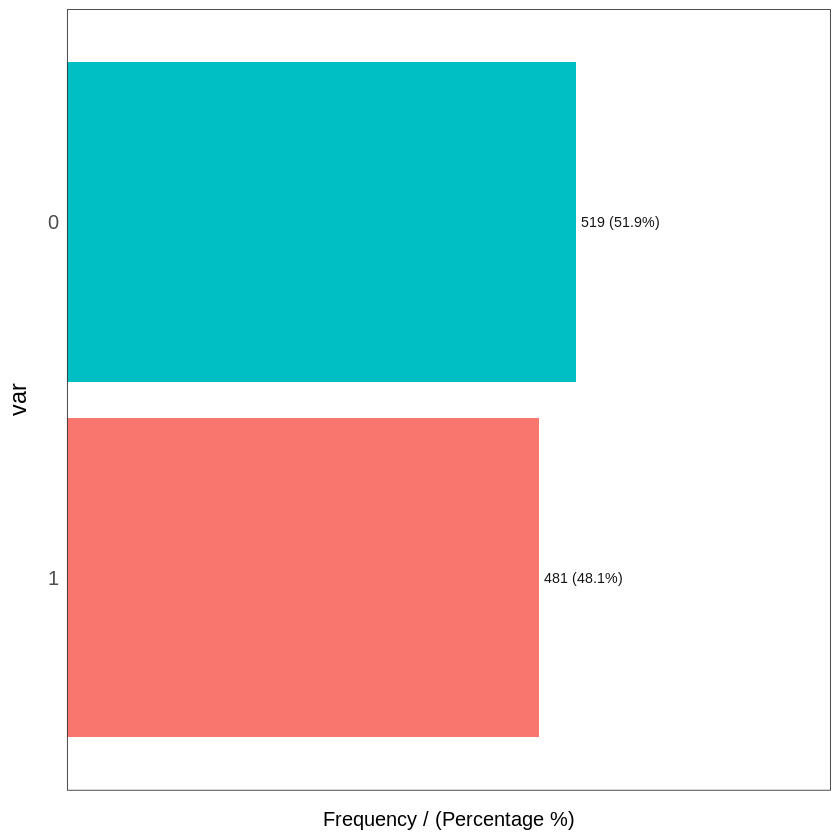

In [30]:
# Gender distribution
freq(data$Gender)

var,frequency,percentage,cumulative_perc
<chr>,<int>,<dbl>,<dbl>
0,500,50,50
1,500,50,100


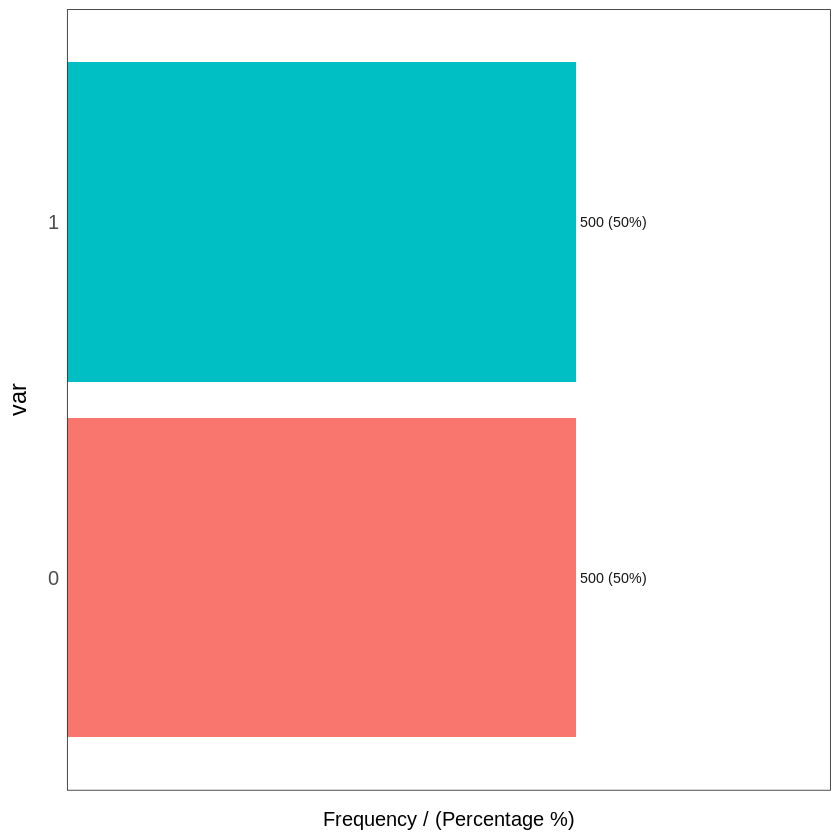

In [31]:
# Checking on the clicked ad distribution
freq(data$`Clicked on Ad`)

In [32]:
# Grouping by Gender and Clicked ads to see the distribution.
g1 <- data %>% group_by(Gender, `Clicked on Ad`)
g1 %>% summarise(n = n())

`summarise()` has grouped output by 'Gender'. You can override using the `.groups` argument.



Gender,Clicked on Ad,n
<int>,<int>,<int>
0,0,250
0,1,269
1,0,250
1,1,231


In [33]:
# Covariance is a statistical representation of the degree to which two variables vary together. 
# Basically, covariance is a number that reflects the degree to which two variable vary together. 
# If the greater values of one variable correspond with the greater values of the other variable, or for the smaller values,
# then the variables show similar behavior, the covariance is a positive. If the greater values of one variable correspond to the smaller values of the other,
# the variables tend to show opposite behavior, the covariance is negative. If one variable is greater and paired equally often with both greater and lesser values on the other, 
# the covariance will be near to zero.

# Covariance and correlation of time spent on the site and age
time <- data$`Daily Time Spent on Site`
age <- data$Age

# covariance using cov() function, correlation using cor()
cov(time,age)
cor(time,age)

# They are highly correlated

[1] -46.17415

[1] -0.3315133

In [34]:
# Covariance and correlation between daily internet usage and age
internet <- data$`Daily Internet Usage`
age <- data$Age
cov(internet,age)
cor(internet,age)

# They are highly correlated.

[1] -141.6348

[1] -0.3672086

In [35]:
ls(data)
# diaplaying the variables.

[1] "Ad Topic Line"            "Age"                     
 [3] "Area Income"              "City"                    
 [5] "Clicked on Ad"            "Country"                 
 [7] "Daily Internet Usage"     "Daily Time Spent on Site"
 [9] "Gender"                   "Timestamp"

In [36]:
# Covariance and correlation between daily internet usage and area income
income <- data$`Area Income`
internet <- data$`Daily Internet Usage`
cov(internet,income)
cor(internet,income)

# They are highly correlated

[1] 198762.5

[1] 0.3374955

In [37]:
# Covariance and correlation between daily internet usage and the gender
gender <- data$Gender
cov(internet,gender)
cor(internet,gender)
# They are moderately correlated

[1] 0.6147667

[1] 0.02801233

In [38]:
# covariance and correlation between daily time usage and income
cov(time,income)
cor(time,income)
# They are highly correlated

[1] 66130.81

[1] 0.3109544

In [39]:
# Correlation between age and income
cor(age,income)
# They are moderately correlated

[1] -0.182605

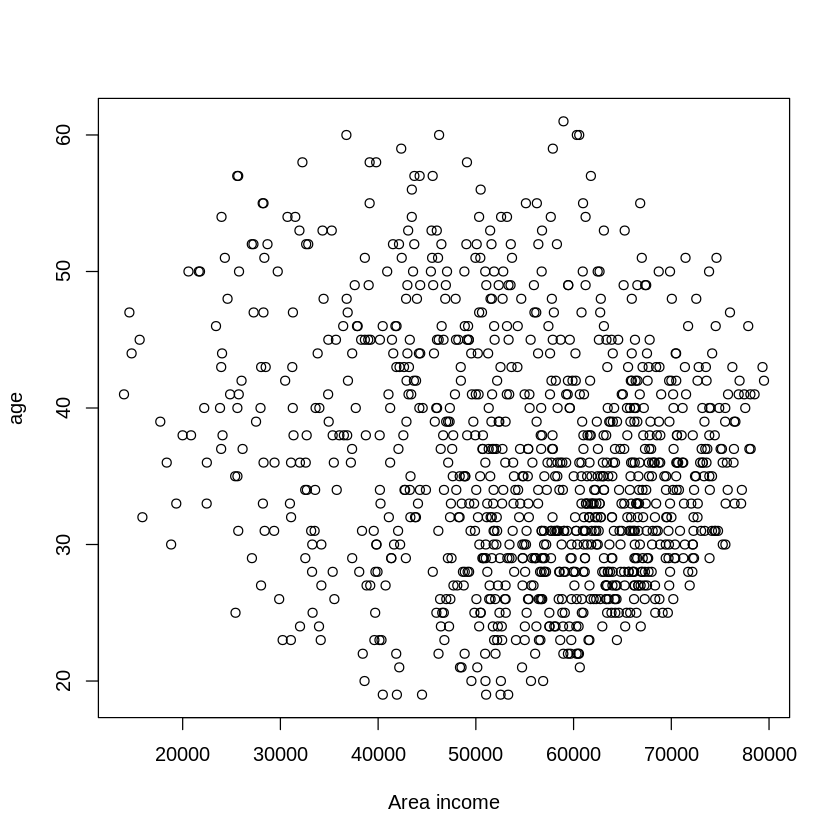

In [40]:
# A scatter plot of age and income.
# They are highly uncorrelated

plot(income, age, xlab="Area income", ylab="age")

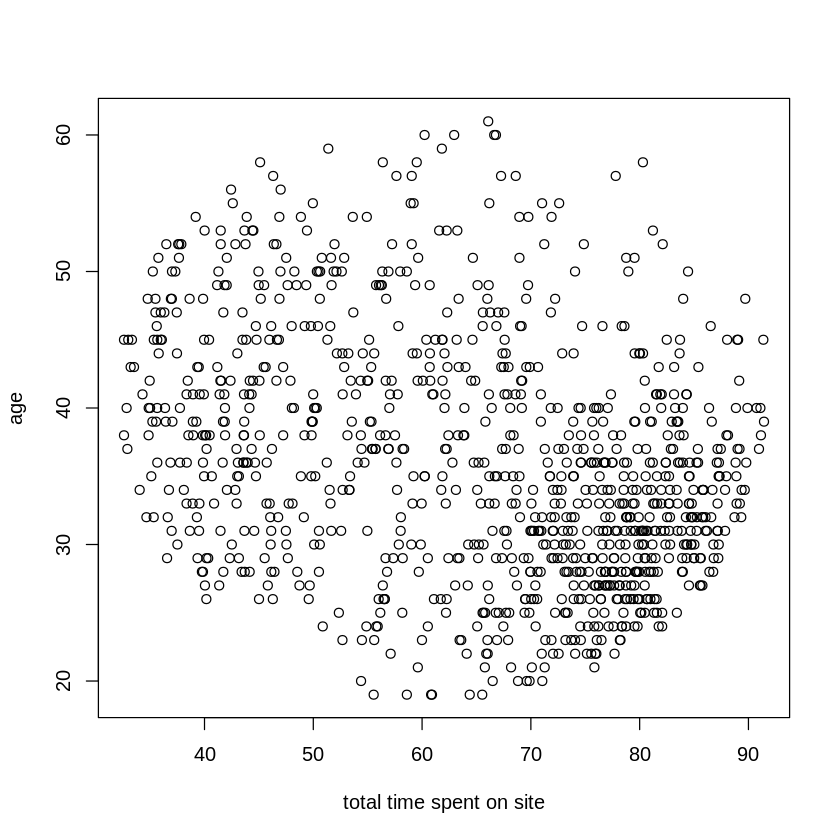

In [41]:
# A scatter plot of time spent on site and age
plot(time, age, xlab="total time spent on site", ylab="age")

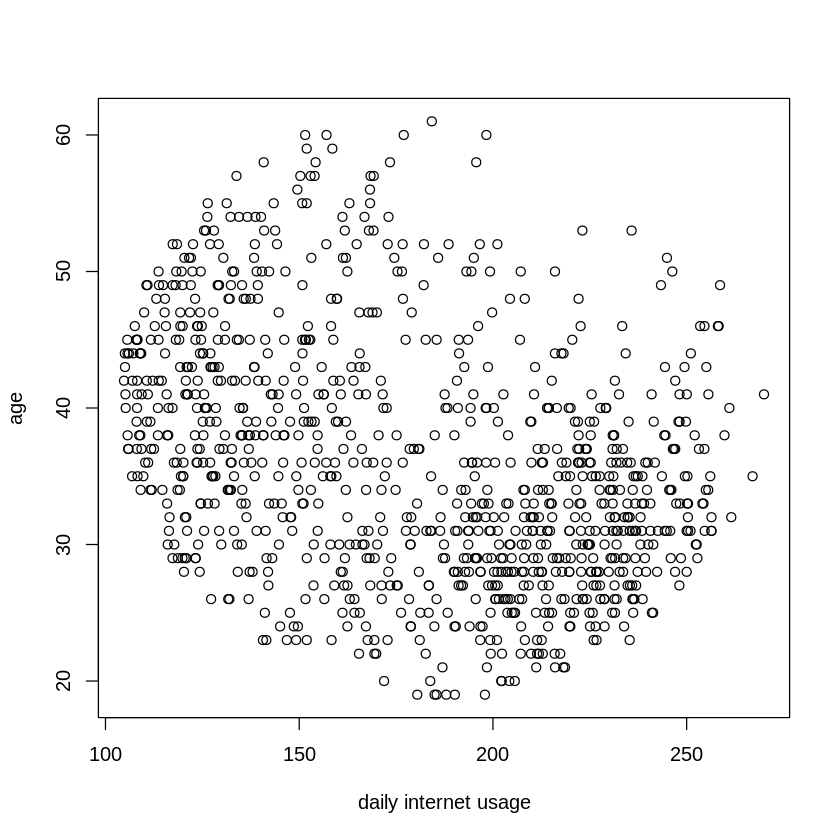

In [42]:
# A scatter plot of daily internet usage and age
plot(internet,age, xlab="daily internet usage", ylab="age")

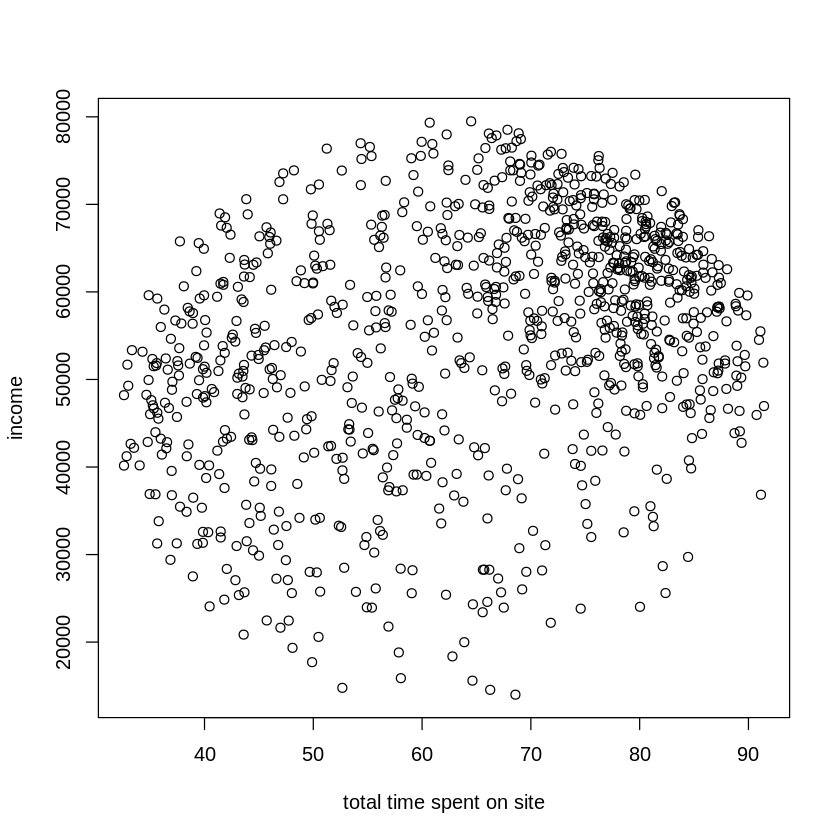

In [43]:
# A scatter plot of total time spent on site and income
plot(time, income, xlab="total time spent on site", ylab="income")


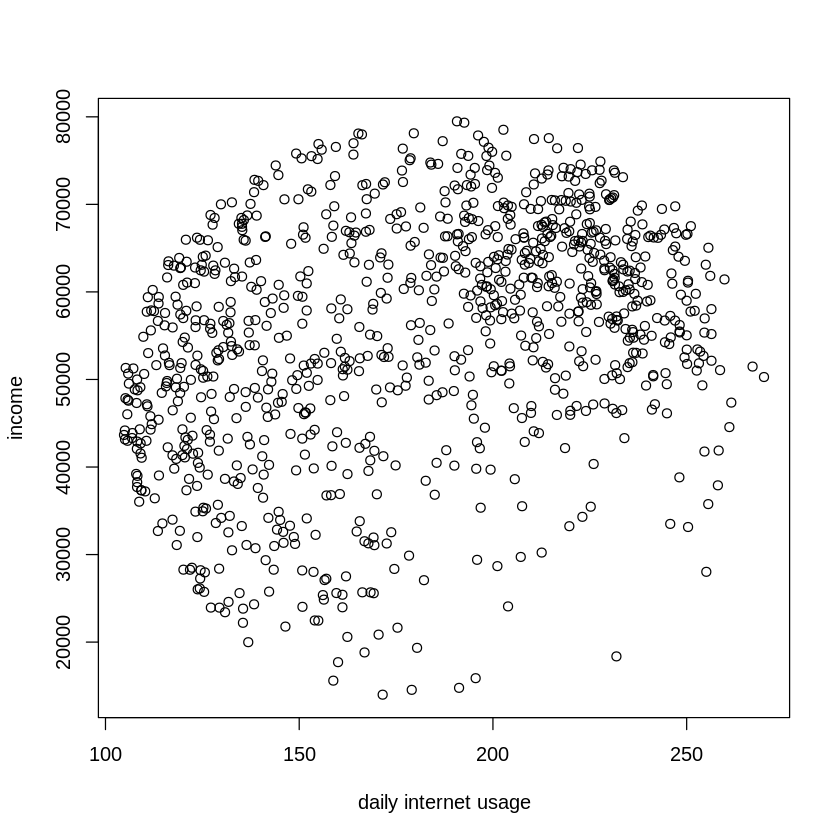

In [44]:
# A scatter plot of dait internet usage and income
plot(internet, income, xlab="daily internet usage", ylab="income")

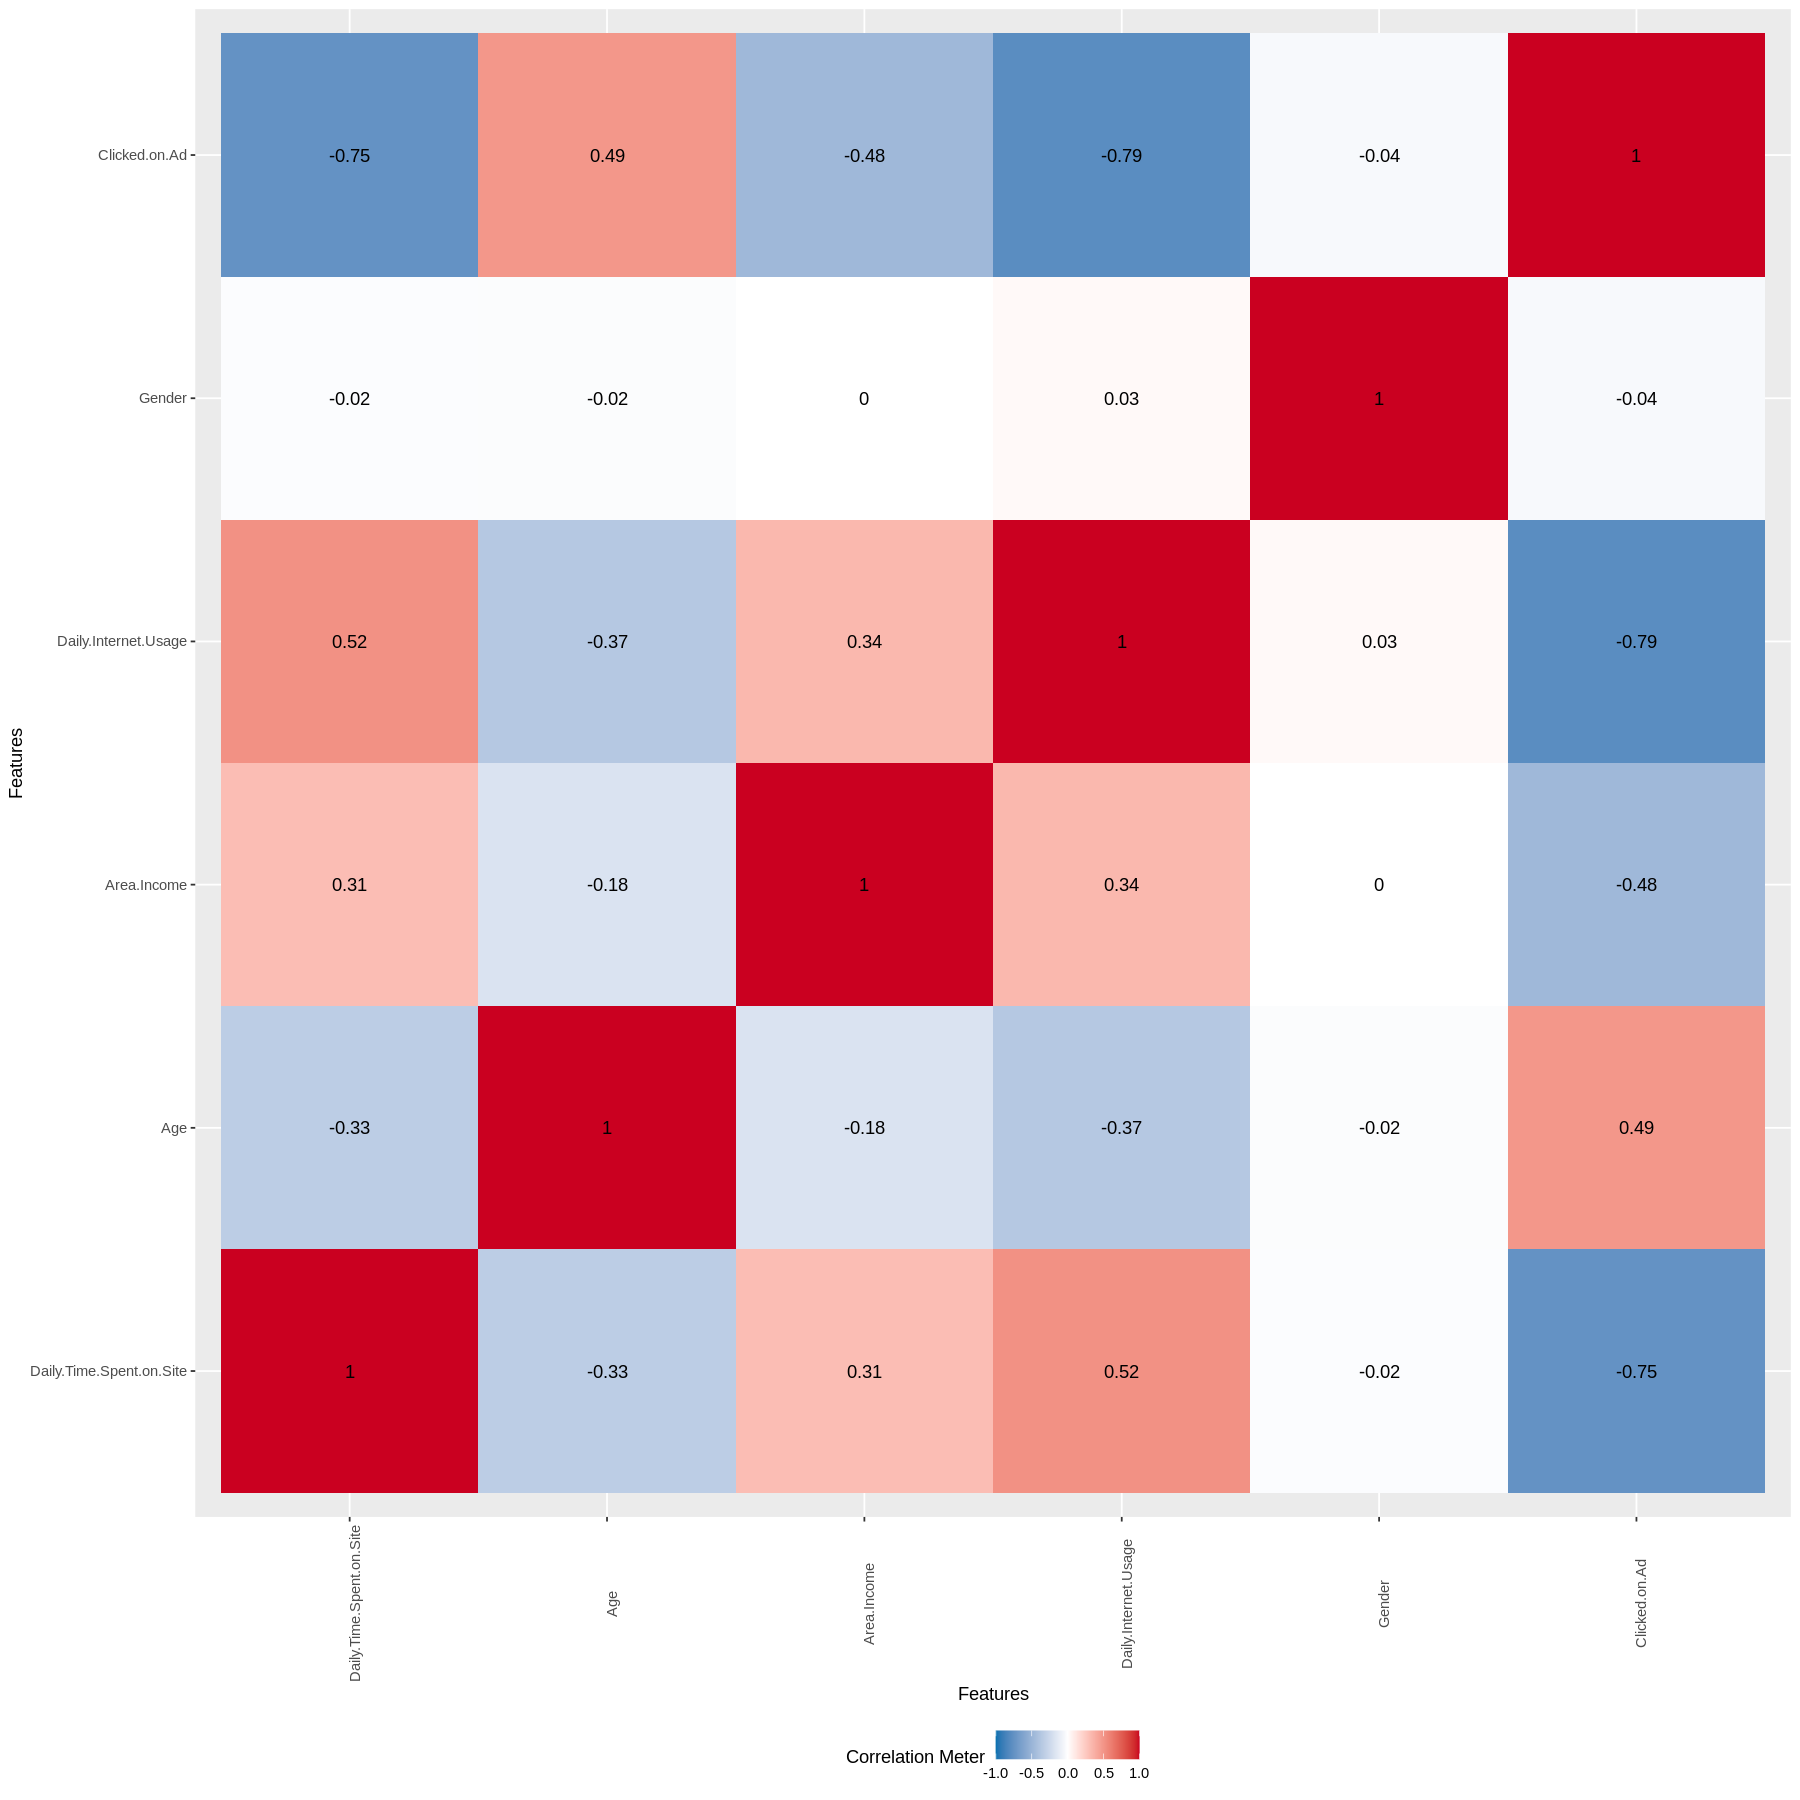

In [45]:
# Heatmap correlation
options(repr.plot.width = 15, repr.plot.height = 15)
plot_correlation(data, type = 'c',cor_args = list( 'use' = 'complete.obs'))

# Supervised learning methods

## Random forest

In [47]:
# Installing packages
install.packages("caret")
library(caret)
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’



Attaching package: ‘caret’


The following object is masked from ‘package:survival’:

    cluster


The following object is masked from ‘package:purrr’:

    lift


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [48]:
library(randomForest)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [53]:
# Checking the Datatypes
sapply(data, class)

$`Daily Time Spent on Site`
[1] "numeric"

$Age
[1] "integer"

$`Area Income`
[1] "numeric"

$`Daily Internet Usage`
[1] "numeric"

$`Ad Topic Line`
[1] "character"

$City
[1] "character"

$Gender
[1] "integer"

$Country
[1] "character"

$Timestamp
[1] "POSIXct" "POSIXt" 

$`Clicked on Ad`
[1] "factor"

In [54]:
# Chaning data type 
data$`Clicked on Ad` <- as.factor(data$`Clicked on Ad`)

In [55]:
head(data)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dttm>,<fct>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [56]:

install.packages("earth")
library(earth)
library(magrittr)
install.packages("e1071")
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [57]:
# Changing column names to lower and replacing spaces with an underscore for readability and easy reference
colnames(data) = tolower(str_replace_all(colnames(data), c(' ' = '_')))

# Checking whether the column names have been renamed appriopriately
print(colnames(data))

 [1] "daily_time_spent_on_site" "age"                     
 [3] "area_income"              "daily_internet_usage"    
 [5] "ad_topic_line"            "city"                    
 [7] "gender"                   "country"                 
 [9] "timestamp"                "clicked_on_ad"           


In [58]:
# Split the data into training and test set
set.seed(123)
training.samples <- data$clicked_on_ad %>% 
  createDataPartition(p = 0.8, list = FALSE)
train.data  <- data[training.samples, ]
test.data <- data[-training.samples, ]

In [59]:
set.seed(100)

# Train the model using rf
model_rf =randomForest(clicked_on_ad ~ ., data=train.data, ntree=1000)
model_rf


Call:
 randomForest(formula = clicked_on_ad ~ ., data = train.data,      ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 3

        OOB estimate of  error rate: 4.12%
Confusion matrix:
    0   1 class.error
0 386  14      0.0350
1  19 381      0.0475

,MeanDecreaseGini
daily_time_spent_on_site,133.418263
age,35.850673
area_income,43.795341
daily_internet_usage,159.322638
ad_topic_line,7.246081
city,5.938138
gender,1.282609
country,5.958346
timestamp,6.673849


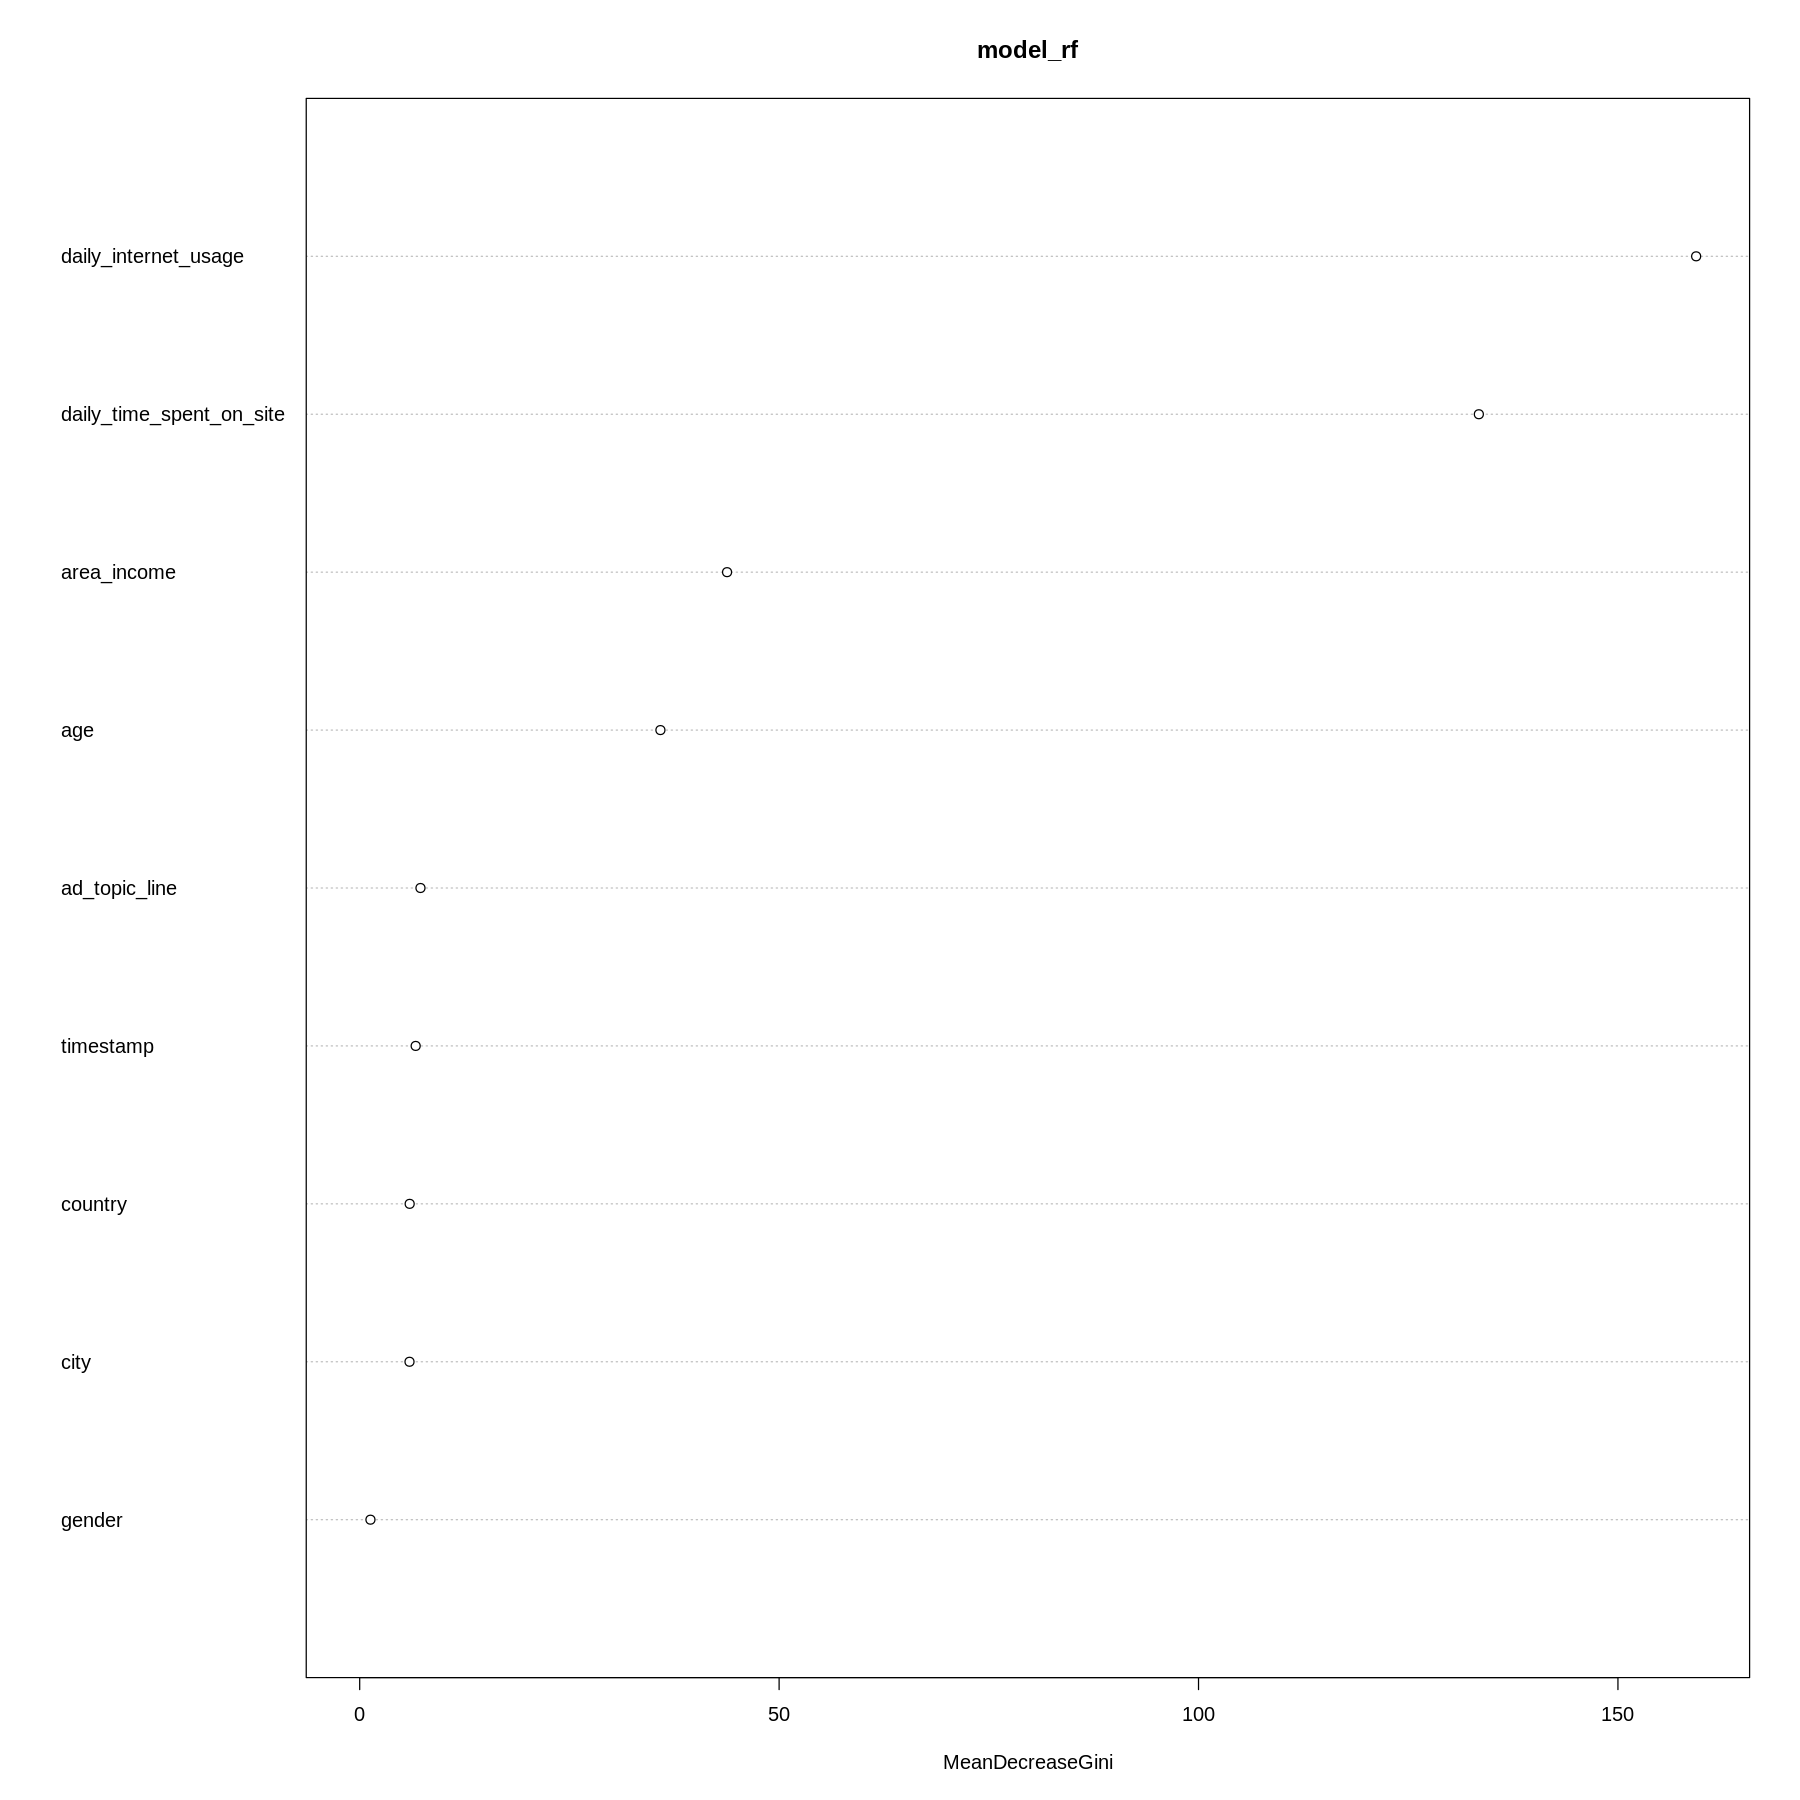

In [60]:
#Evaluate variable importance
importance(model_rf)
varImpPlot(model_rf)

In [61]:
predict(model_rf, newdata= data)



1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   0    0    0    0    0    0    0    1    0    0    1    0    1    0    1    1 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   1    0    1    1    0    0    1    0    1    0    1    1    1    0    0    0 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   1    1    1    0    1    0    1    1    0    0    0    0    0    1    0    0 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   1    1    0    0    1    1    1    0    1    1    0    1    0    0    0    0 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
   1    0    1    1    0    1    1    0    1    1    1    0    1    0    1    1 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
   0    0    1    1    0    1    0    1    1    1    1    1    0    1    1    0 
  97   98   99  100  101  102  103  104  105  106  107  108  109  110  111  112 
   1    1    1    0    1    0    0    0    0    0    0    1    1    0    1    1 
 113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128 
   0    1    0    0    1    1    1    1    0    1    0    1    1    0    1    0 
 129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144 
   0    0    1    1    1    0    1    1    1    1    0    1    0    1    1    0 
 145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160 
   0    1    1    1    1    1    0    0    1    0    0    0    1    1    0    1 
 161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176 
   0    0    0    0    1    1    1    0    1    0    1    0    0    0    1    0 
 177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192 
   1    0    1    0    1    1    1    0    0    1    1    0    1    1    1    1 
 193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208 
   1    1    0    1    1    0    0    0    0    0    1    0    0    1    0    0 
 209  210  211  212  213  214  215  216  217  218  219  220  221  222  223  224 
   1    1    0    1    0    1    0    1    1    1    1    1    0    0    1    1 
 225  226  227  228  229  230  231  232  233  234  235  236  237  238  239  240 
   0    1    1    1    0    0    0    1    1    0    1    1    1    0    1    0 
 241  242  243  244  245  246  247  248  249  250  251  252  253  254  255  256 
   1    1    0    0    0    0    1    1    1    1    0    1    0    1    1    0 
 257  258  259  260  261  262  263  264  265  266  267  268  269  270  271  272 
   0    1    0    1    0    1    1    1    0    1    1    0    1    0    1    0 
 273  274  275  276  277  278  279  280  281  282  283  284  285  286  287  288 
   0    0    0    1    0    0    0    0    1    1    1    0    1    0    1    0 
 289  290  291  292  293  294  295  296  297  298  299  300  301  302  303  304 
   1    1    1    0    1    0    0    0    0    0    0    0    0    1    1    1 
 305  306  307  308  309  310  311  312  313  314  315  316  317  318  319  320 
   1    1    0    0    0    1    0    0    1    0    0    1    0    0    0    1 
 321  322  323  324  325  326  327  328  329  330  331  332  333  334  335  336 
   1    0    0    0    0    1    1    0    0    1    0    0    1    0    0    1 
 337  338  339  340  341  342  343  344  345  346  347  348  349  350  351  352 
   0    0    0    0    1    1    0    0    1    0    0    1    0    1    0    0 
 353  354  355  356  357  358  359  360  361  362  363  364  365  366  367  368 
   0    0    1    0    1    1    1    0    1    1    0    1    0    1    0    0 
 369  370  371  372  373  374  375  376  377  378  379  380  381  382  383  384 
   0    0    1    1    0    1    0    0    0    1    1    0    0    1    0    0 
 385  386  387  388  389  390  391  392  393  394  395  396  397  398  399  400 
   1    0    0    1    0    1    0

In [62]:
prediction <-predict(model_rf, test.data)

In [63]:
confusionMatrix(prediction, test.data$clicked_on_ad)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 97  1
         1  3 99
                                          
               Accuracy : 0.98            
                 95% CI : (0.9496, 0.9945)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.96            
                                          
 Mcnemar's Test P-Value : 0.6171          
                                          
            Sensitivity : 0.9700          
            Specificity : 0.9900          
         Pos Pred Value : 0.9898          
         Neg Pred Value : 0.9706          
             Prevalence : 0.5000          
         Detection Rate : 0.4850          
   Detection Prevalence : 0.4900          
      Balanced Accuracy : 0.9800          
                                          
       'Positive' Class : 0               
                                    

In [64]:
trainControl(method = "cv", number = n, search ="grid")

$method
[1] "cv"

$number
function () 
{
    length(peek_mask("n()")$current_rows())
}
<bytecode: 0x55e0271da3f8>
<environment: namespace:dplyr>

$repeats
[1] NA

$search
[1] "grid"

$p
[1] 0.75

$initialWindow
NULL

$horizon
[1] 1

$fixedWindow
[1] TRUE

$skip
[1] 0

$verboseIter
[1] FALSE

$returnData
[1] TRUE

$returnResamp
[1] "final"

$savePredictions
[1] FALSE

$classProbs
[1] FALSE

$summaryFunction
function (data, lev = NULL, model = NULL) 
{
    if (is.character(data$obs)) 
        data$obs <- factor(data$obs, levels = lev)
    postResample(data[, "pred"], data[, "obs"])
}
<bytecode: 0x55e02774ce08>
<environment: namespace:caret>

$selectionFunction
[1] "best"

$preProcOptions
$preProcOptions$thresh
[1] 0.95

$preProcOptions$ICAcomp
[1] 3

$preProcOptions$k
[1] 5

$preProcOptions$freqCut
[1] 19

$preProcOptions$uniqueCut
[1] 10

$preProcOptions$cutoff
[1] 0.9


$sampling
NULL

$index
NULL

$indexOut
NULL

$indexFinal
NULL

$timingSamps
[1] 0

$predictionBounds
[1] FALSE FALSE

$seeds
[1] NA

$adaptive
$adaptive$min
[1] 5

$adaptive$alpha
[1] 0.05

$adaptive$method
[1] "gls"

$adaptive$complete
[1] TRUE


$trim
[1] FALSE

$allowParallel
[1] TRUE

In [65]:

# Define the control
trControl <- trainControl(method = "cv",
    number = 5,
    search = "grid")

In [66]:
# Tuning the hyper parameters by setting tuneLength

model_2 = train(clicked_on_ad ~ ., data=train.data, method='rf', tuneLength = 5, metric='Accuracy', trControl = trControl)
model_2

# Predict the test data and computing the confusion matrix
y_pred_2 <- predict(model_2, test.data)
confusionMatrix(y_pred_2, test.data$clicked_on_ad)

Random Forest 

800 samples
  9 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 640, 640, 640, 640, 640 
Resampling results across tuning parameters:

  mtry  Accuracy  Kappa 
     2  0.62875   0.2575
    10  0.93375   0.8675
    60  0.96250   0.9250
   330  0.96125   0.9225
  1814  0.94875   0.8975

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 60.

ERROR: ignored

## Decision Trees

In [71]:
install.packages("ranger")
library(ranger)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’



Attaching package: ‘ranger’


The following object is masked from ‘package:randomForest’:

    importance




In [72]:
# Training the model
model_dt <- train(clicked_on_ad ~ .,
               data = train.data,
               method = "ranger",
               tuneLength = 5)

Growing trees.. Progress: 76%. Estimated remaining time: 9 seconds.
Growing trees.. Progress: 81%. Estimated remaining time: 7 seconds.
Growing trees.. Progress: 77%. Estimated remaining time: 9 seconds.
Growing trees.. Progress: 66%. Estimated remaining time: 16 seconds.
Growing trees.. Progress: 69%. Estimated remaining time: 14 seconds.
Growing trees.. Progress: 76%. Estimated remaining time: 9 seconds.
Growing trees.. Progress: 77%. Estimated remaining time: 9 seconds.
Growing trees.. Progress: 70%. Estimated remaining time: 13 seconds.
Growing trees.. Progress: 72%. Estimated remaining time: 11 seconds.
Growing trees.. Progress: 68%. Estimated remaining time: 14 seconds.
Growing trees.. Progress: 71%. Estimated remaining time: 12 seconds.
Growing trees.. Progress: 68%. Estimated remaining time: 14 seconds.
Growing trees.. Progress: 75%. Estimated remaining time: 10 seconds.
Growing trees.. Progress: 76%. Estimated remaining time: 9 seconds.
Growing trees.. Progress: 73%. Estimated

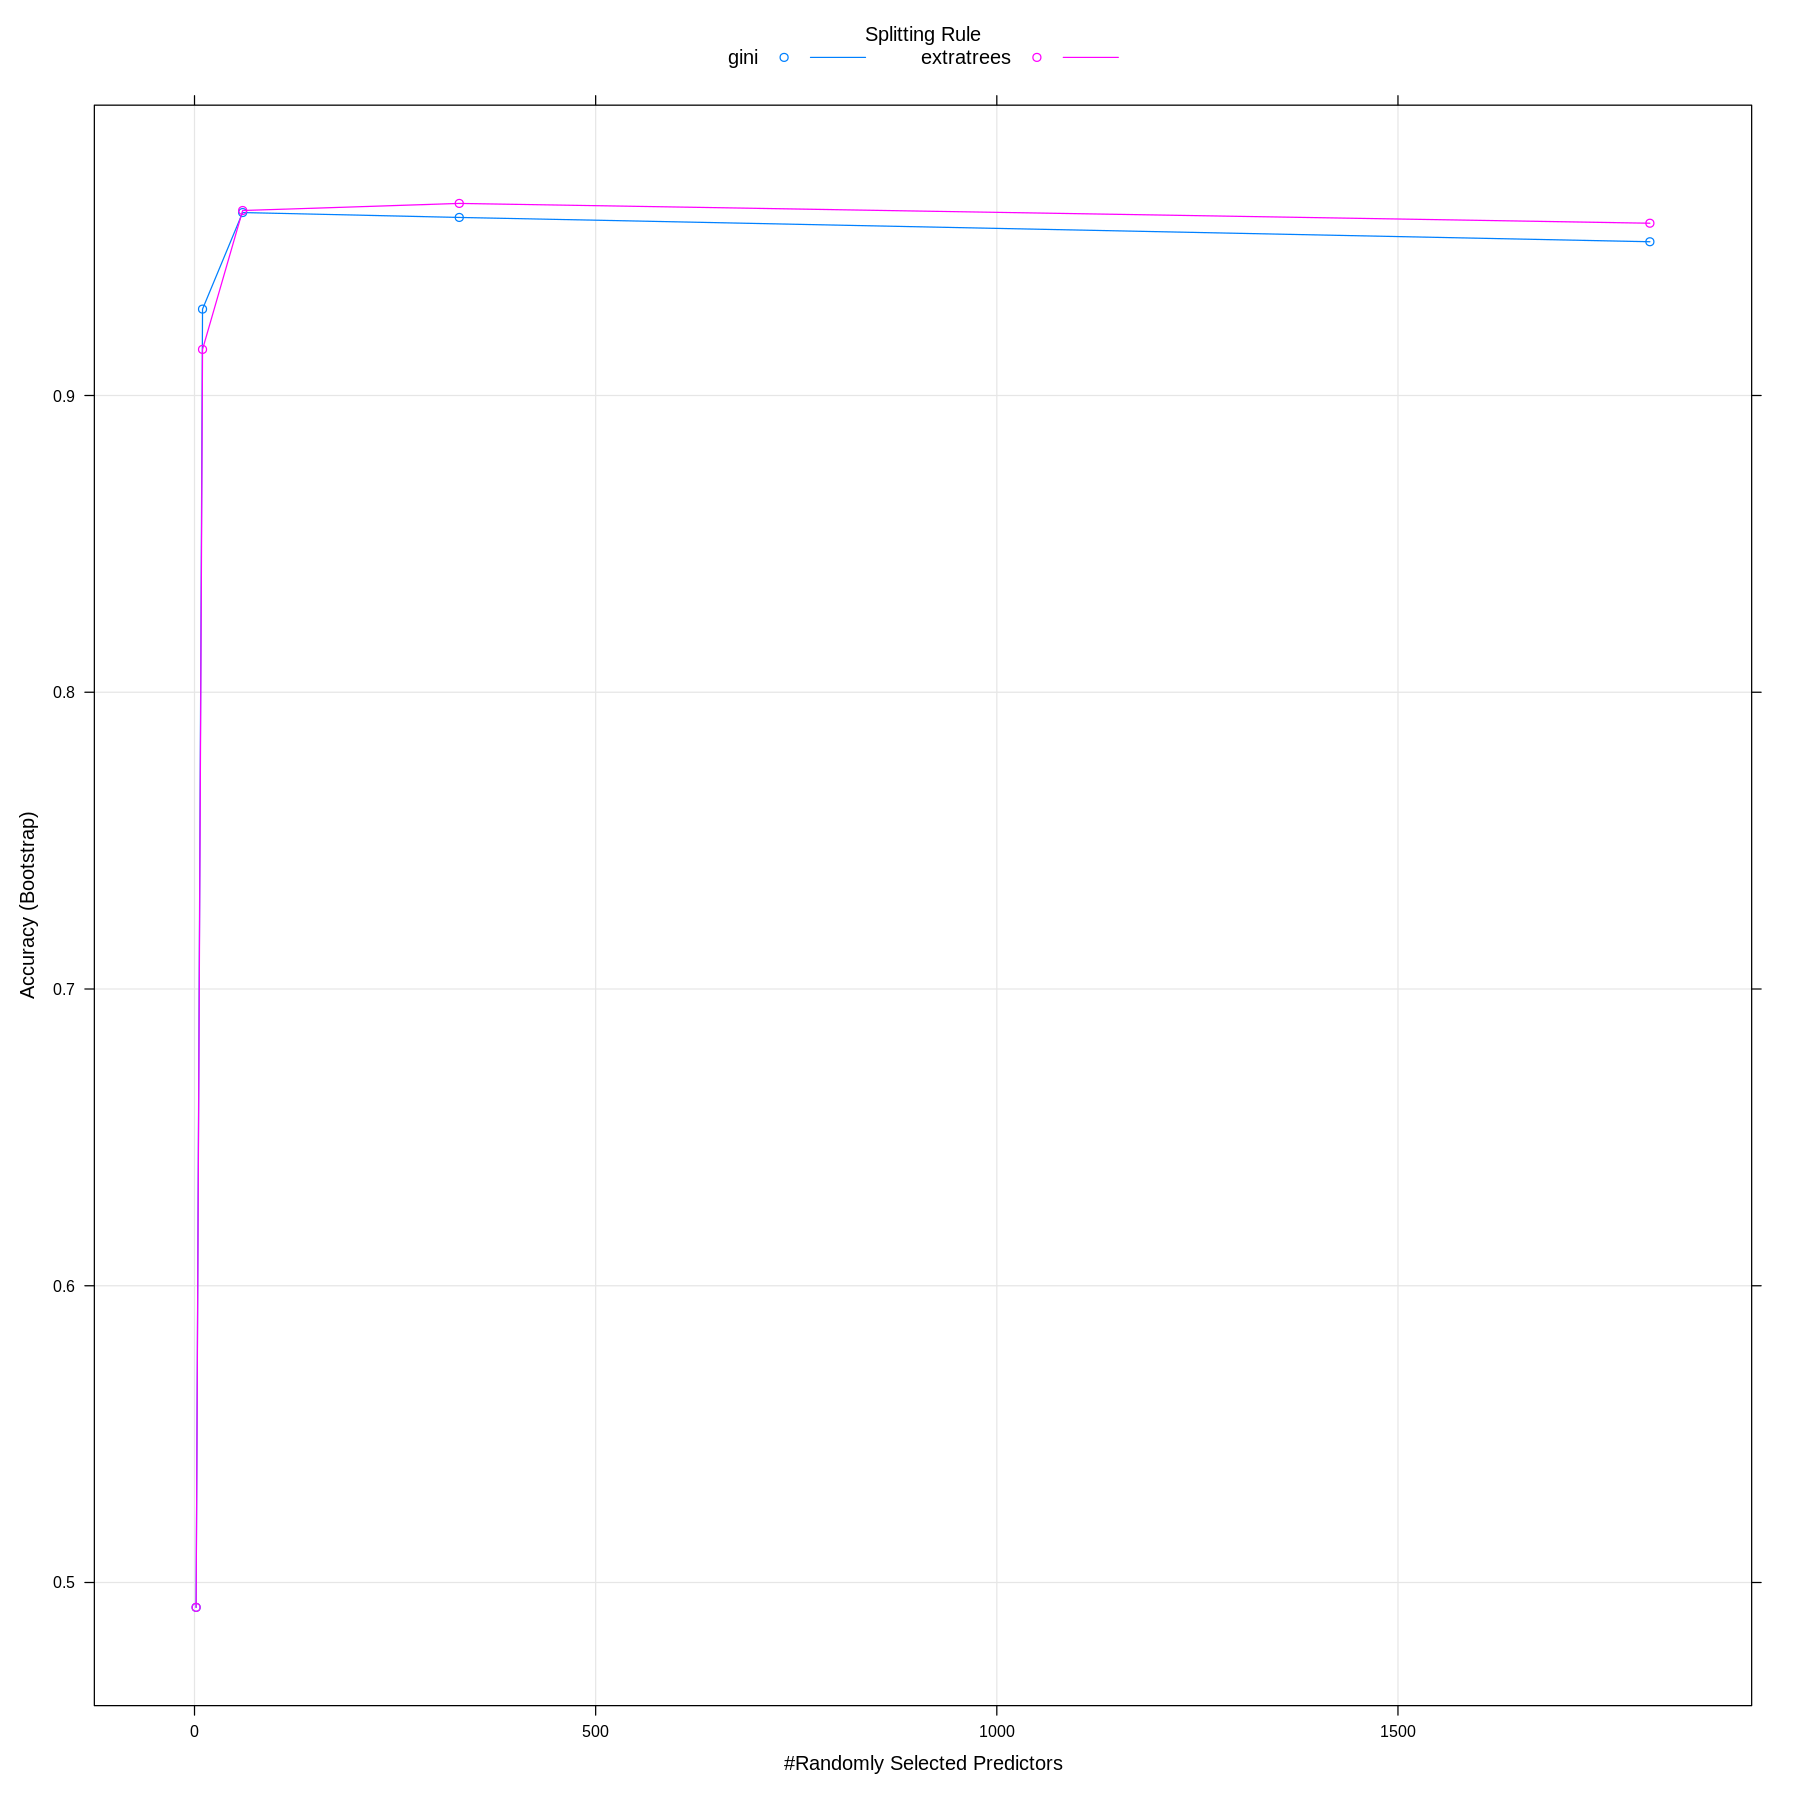

In [73]:
# Plotting the model
plot(model_dt)

In [74]:
set.seed(42)
myGrid <- expand.grid(mtry = c(5, 10, 20, 40, 60),
                     splitrule = c("gini", "extratrees"),
                     min.node.size = 10)
model_dt2 <- train(clicked_on_ad  ~ .,
               data = train.data,
               method = "ranger", 
               tuneGrid = myGrid,
               trControl = trainControl(method = "cv",
                                       number = 5,
                                       verboseIter = FALSE))

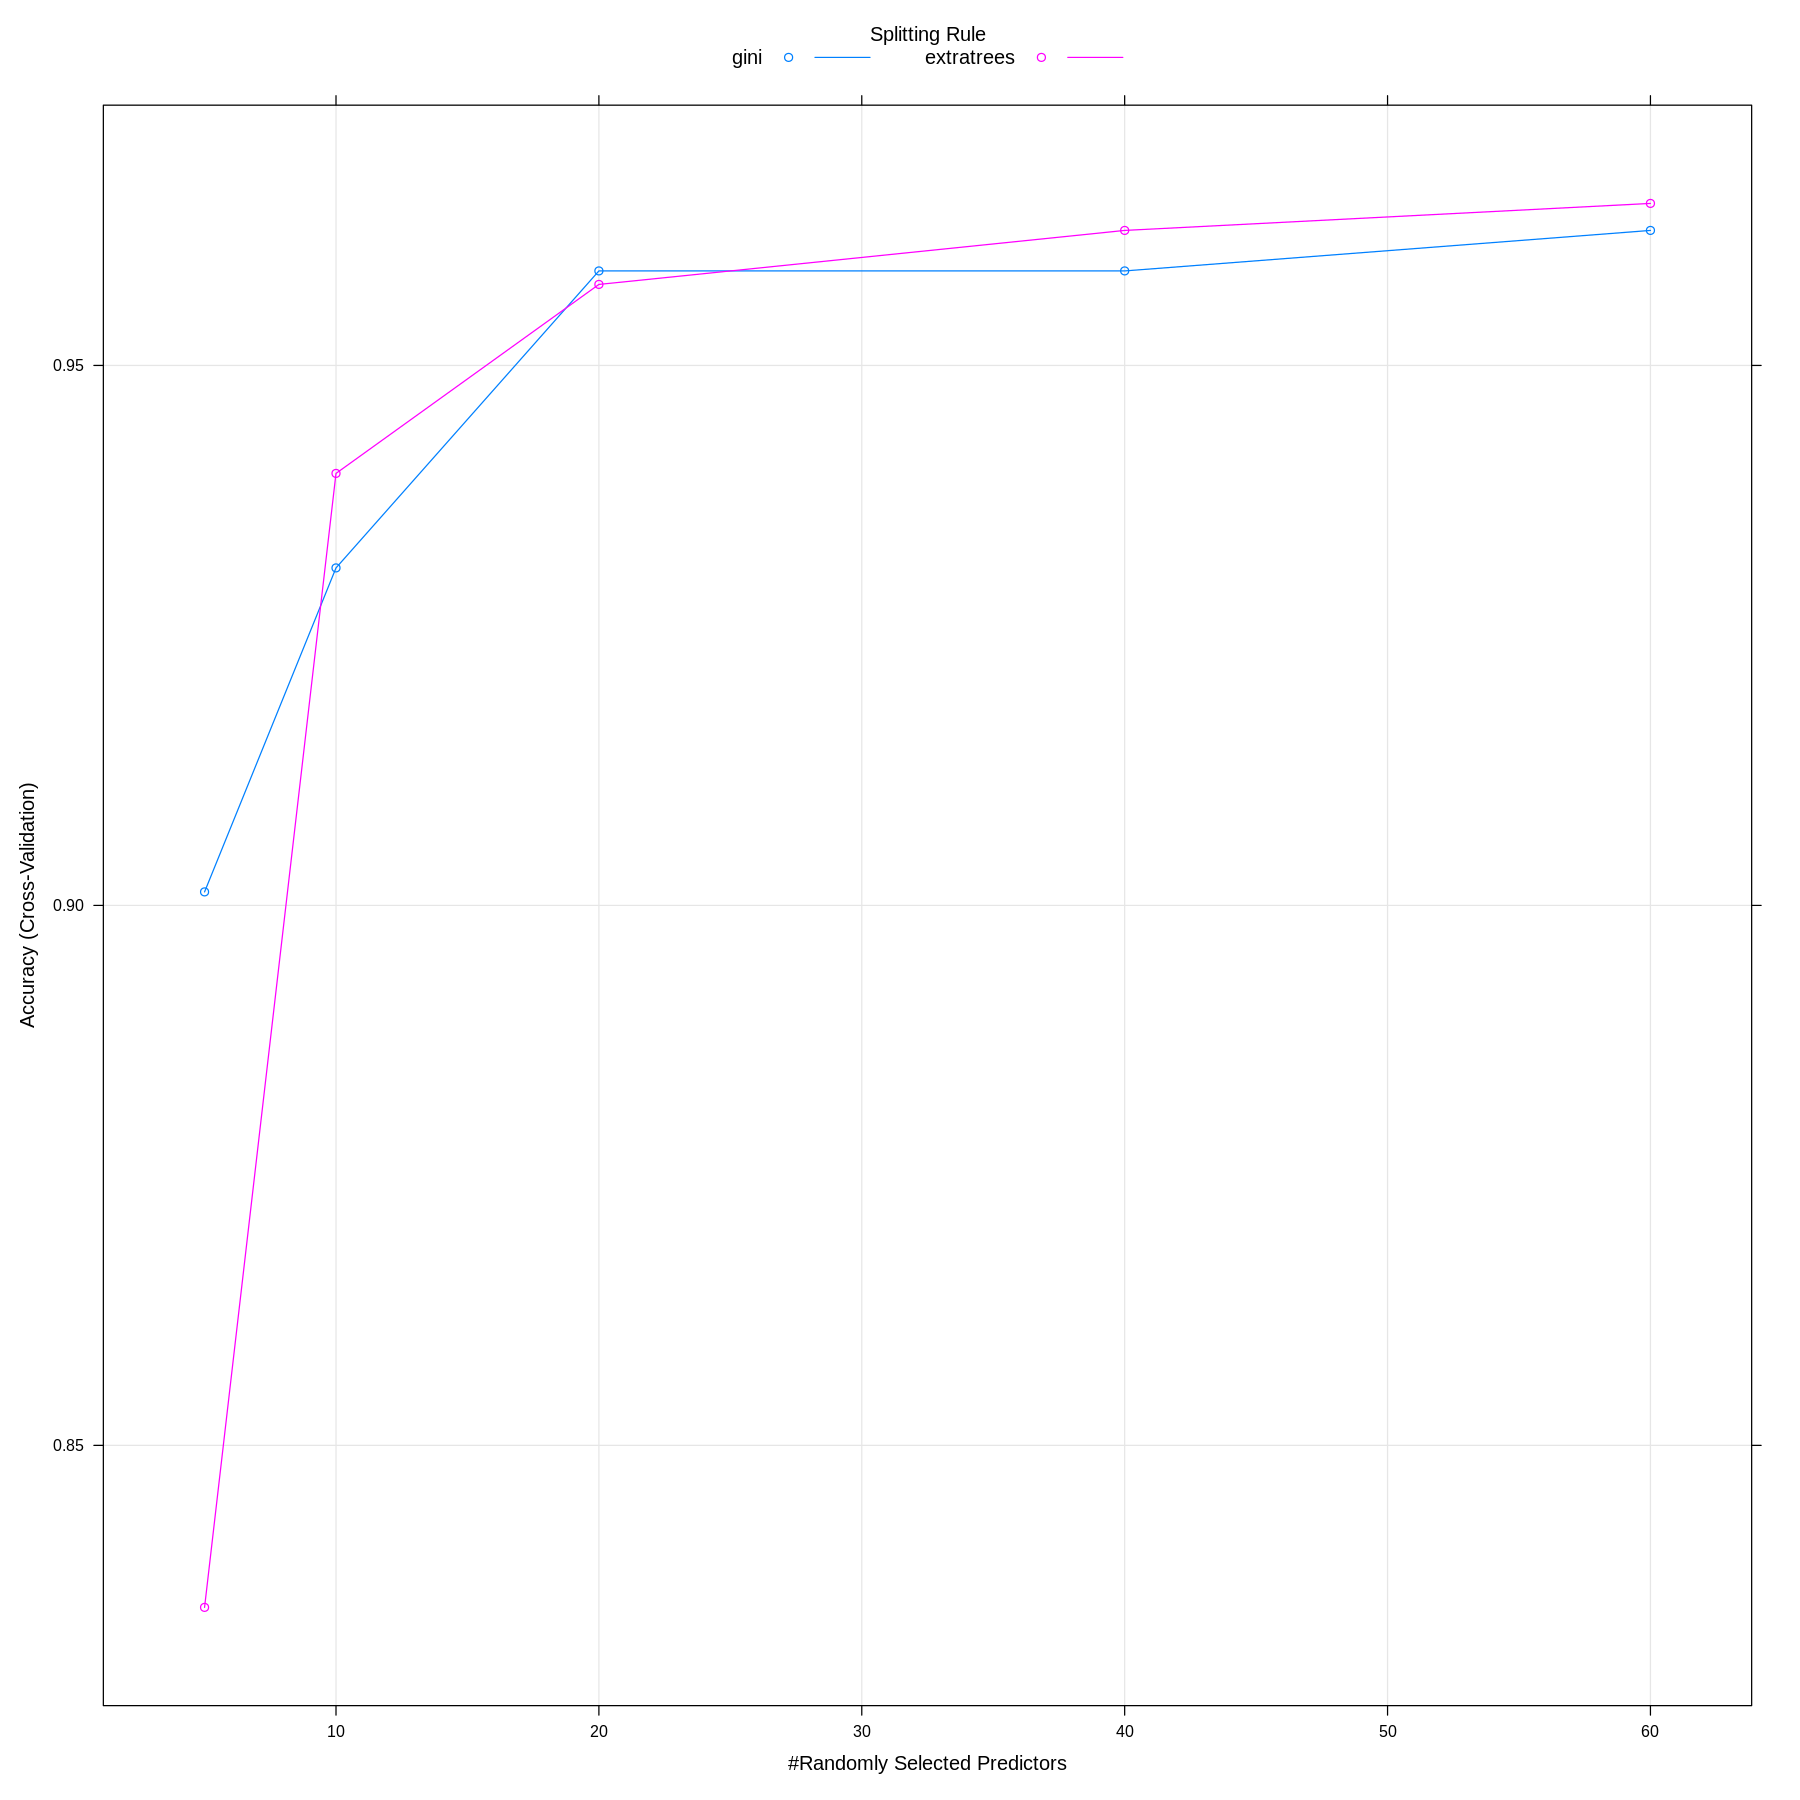

In [75]:
plot(model_dt2)

The random forest model had an accuracy of 96%



Decision Trees model had an accuracy of 96% also after hyperparameter tuning.


Both models have high accuracy. Any of them can be used to predict the outcome.

# 8. Conclusions and recommendations

On daily time spent on the site , 32.60 is the min time spent, 65 mins makes the average and most time spent on the blog is 91 mins.
Age distribution of individuals accessing the site is quite reasonable with the min being 19 to 23 years of age and max 57 to 61, the avarage age of a blog visitor is 36 years.
Income has an average of 55,000. Despite there being some outliers in income it was not reasonable to drop them since every one earns a unique amount. 40k to around 70k being the most popular. This says alot about the type of individuals who read her blogs.
Internet usage ranged between 104.8 to 270 units with an average of 180.
Ages 20's to late 40's have high numbers.
People earning around 20k to 60k spending roughly 40 to 60 mins on the site are most likely to click on an ad.
People aged 25 to 60 are most likely to click on an ad if they spend 30 to 60 mins at most on the site.
It is evident that time spent has negative corelation with clicked ads showing that the more time spent on the internet, the less the clicked ads



Recommendations


Have relevant ads which are not very long so that the people who visit the site may 